In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('rape.csv')

In [8]:
df

,Area_Name,Year,Subgroup,Cases_Reported,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [9]:
df.isnull()

,Area_Name,Year,Subgroup,Cases_Reported,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1045,False,False,False,False,False,False,False,False,False,False,False
1046,False,False,False,False,False,False,False,False,False,False,False
1047,False,False,False,False,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False,False,False,False,False


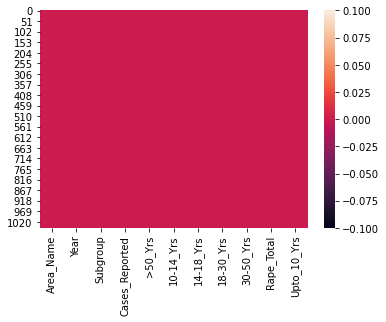

In [10]:
#no null value present
sns.heatmap(df.isnull())

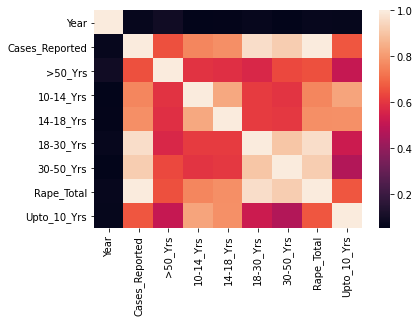

In [11]:
dfcor=df.corr()
sns.heatmap(dfcor)

In [12]:
df.describe()

,Year,Cases_Reported,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [14]:
df1=df.drop(['Area_Name','Subgroup'],axis=1)

In [15]:
df1

,Year,Cases_Reported,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
0,2001,3,0,0,3,0,0,3,0
1,2001,1,0,0,1,0,0,1,0
2,2001,2,0,0,2,0,0,2,0
3,2002,2,0,0,1,1,0,2,0
4,2002,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1045,2009,3,0,0,1,1,1,3,0
1046,2009,2333,0,18,84,1834,391,2333,6
1047,2010,2311,0,22,51,1779,459,2311,0
1048,2010,4,0,1,0,2,1,4,0


Year                 AxesSubplot(0.125,0.536818;0.110714x0.343182)
Cases_Reported    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
>50_Yrs           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
10-14_Yrs         AxesSubplot(0.523571,0.536818;0.110714x0.343182)
14-18_Yrs         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
18-30_Yrs         AxesSubplot(0.789286,0.536818;0.110714x0.343182)
30-50_Yrs               AxesSubplot(0.125,0.125;0.110714x0.343182)
Rape_Total           AxesSubplot(0.257857,0.125;0.110714x0.343182)
Upto_10_Yrs          AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

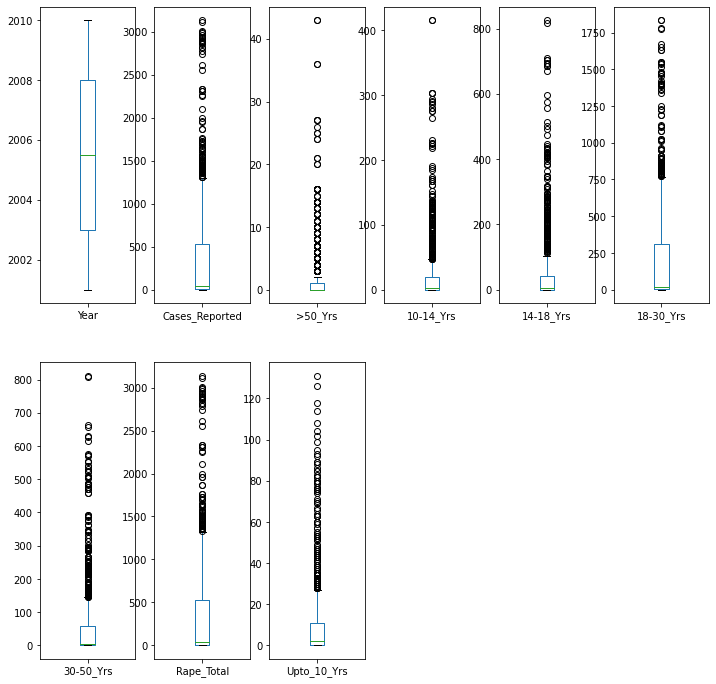

In [17]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(12,12))

In [18]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
threshold=3
print(np.where(z>3))
df_new=df1[(z<3).all(axis=1)]
df_new

(array([ 108,  110,  111,  111,  113,  113,  117,  119,  141,  143,  180,
        182,  192,  194,  195,  197,  204,  204,  206,  206,  207,  209,
        285,  288,  290,  291,  293,  486,  488,  570,  570,  570,  570,
        570,  570,  570,  572,  572,  572,  572,  572,  572,  572,  573,
        573,  573,  573,  573,  573,  575,  575,  575,  575,  575,  576,
        576,  576,  576,  576,  576,  578,  578,  578,  578,  578,  579,
        579,  579,  579,  579,  579,  581,  581,  581,  581,  581,  581,
        582,  582,  582,  582,  582,  582,  582,  582,  584,  584,  584,
        584,  584,  584,  584,  584,  585,  585,  585,  585,  585,  587,
        587,  587,  587,  587,  588,  588,  588,  588,  588,  588,  588,
        590,  590,  590,  590,  590,  590,  590,  591,  591,  591,  591,
        591,  591,  591,  591,  593,  593,  593,  593,  593,  593,  593,
        594,  594,  594,  594,  594,  594,  594,  596,  596,  596,  596,
        596,  596,  596,  597,  597,  597,  597,  

,Year,Cases_Reported,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
0,2001,3,0,0,3,0,0,3,0
1,2001,1,0,0,1,0,0,1,0
2,2001,2,0,0,2,0,0,2,0
3,2002,2,0,0,1,1,0,2,0
4,2002,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1036,2006,6,0,0,0,6,0,6,0
1039,2007,114,0,2,3,81,25,114,3
1042,2008,9,0,2,1,1,0,9,5
1045,2009,3,0,0,1,1,1,3,0


In [20]:
df_new.shape

(963, 9)

In [21]:
df.shape

(1050, 11)

In [22]:
df.skew()

Year              0.000000
Cases_Reported    2.228595
>50_Yrs           4.151161
10-14_Yrs         3.554447
14-18_Yrs         3.327417
18-30_Yrs         2.089371
30-50_Yrs         2.905033
Rape_Total        2.226962
Upto_10_Yrs       2.845238
dtype: float64

In [56]:
# remove skewness(not able to apply boxcox and yeo transform)
import numpy as np
from sklearn.preprocessing import power_transform
pt=power_transform(df1,method='box-cox')
new=pd.DataFrame(pt,columns=df1.columns)# converting into dataframe

ValueError: The Box-Cox transformation can only be applied to strictly positive data

In [25]:
df1.skew()

Year              0.000000
Cases_Reported    2.228595
>50_Yrs           4.151161
10-14_Yrs         3.554447
14-18_Yrs         3.327417
18-30_Yrs         2.089371
30-50_Yrs         2.905033
Rape_Total        2.226962
Upto_10_Yrs       2.845238
dtype: float64

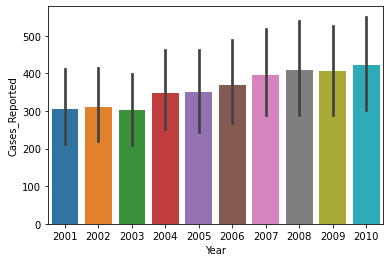

In [26]:
sns.barplot(x="Year",y="Cases_Reported",data=df)

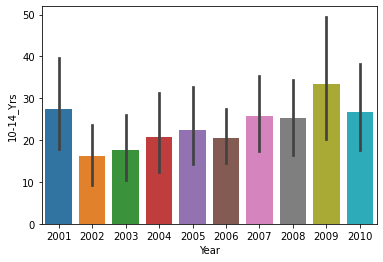

In [29]:
sns.barplot(x="Year",y="10-14_Yrs",data=df)

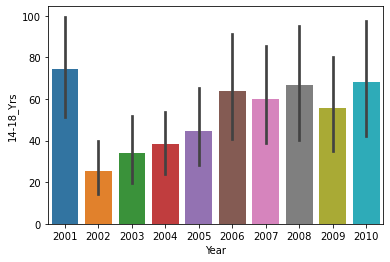

In [30]:
sns.barplot(x="Year",y="14-18_Yrs",data=df)

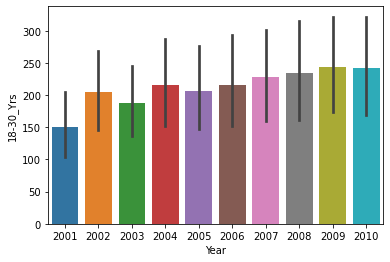

In [31]:
sns.barplot(x="Year",y="18-30_Yrs",data=df)

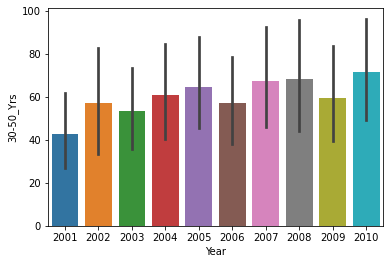

In [32]:
sns.barplot(x="Year",y="30-50_Yrs",data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AAA86194F0>,
      dtype=object)

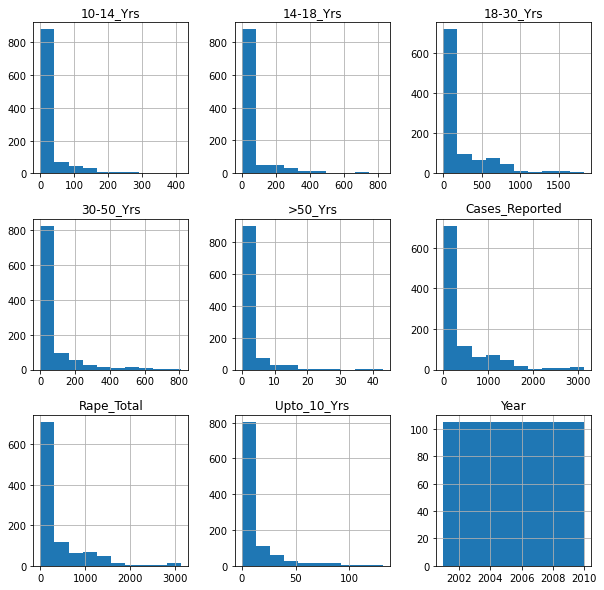

In [48]:
df.hist(figsize=(10,10))

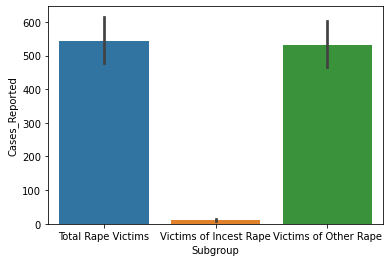

In [50]:
sns.barplot(x="Subgroup",y="Cases_Reported",data=df)

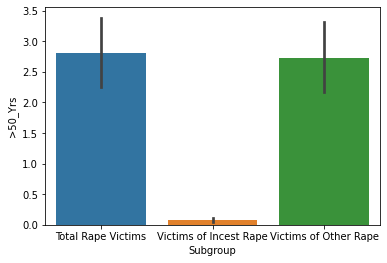

In [51]:
sns.barplot(x="Subgroup",y=">50_Yrs",data=df)

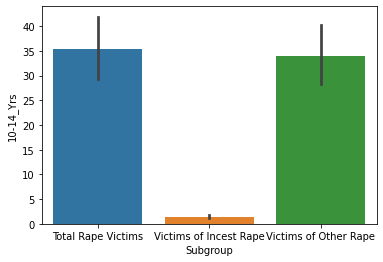

In [53]:
sns.barplot(x="Subgroup",y="10-14_Yrs",data=df)

In [33]:
df2=df1.drop(['Cases_Reported'],axis=1)

In [34]:
df2

,Year,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
0,2001,0,0,3,0,0,3,0
1,2001,0,0,1,0,0,1,0
2,2001,0,0,2,0,0,2,0
3,2002,0,0,1,1,0,2,0
4,2002,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1045,2009,0,0,1,1,1,3,0
1046,2009,0,18,84,1834,391,2333,6
1047,2010,0,22,51,1779,459,2311,0
1048,2010,0,1,0,2,1,4,0


In [35]:
x=df2.iloc[ :,:]
x

,Year,>50_Yrs,10-14_Yrs,14-18_Yrs,18-30_Yrs,30-50_Yrs,Rape_Total,Upto_10_Yrs
0,2001,0,0,3,0,0,3,0
1,2001,0,0,1,0,0,1,0
2,2001,0,0,2,0,0,2,0
3,2002,0,0,1,1,0,2,0
4,2002,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1045,2009,0,0,1,1,1,3,0
1046,2009,0,18,84,1834,391,2333,6
1047,2010,0,22,51,1779,459,2311,0
1048,2010,0,1,0,2,1,4,0


In [36]:
y=df.iloc[ :,3]
y

0          3
1          1
2          2
3          2
4          0
        ... 
1045       3
1046    2333
1047    2311
1048       4
1049    2307
Name: Cases_Reported, Length: 1050, dtype: int64

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [38]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [39]:
lm.coef_

array([-0.01977634,  0.15182077,  0.17275475,  0.14811325,  0.15051361,
        0.15069908,  0.84967246,  0.07577101])

In [40]:
lm.intercept_

39.696063361613994

In [41]:
lm.score(x_train,y_train)

0.9999972576397498

In [42]:
pred=lm.predict(x_test)

In [43]:
print("predict result",pred)

predict result [ 4.00335536e+00  1.41265583e+02  2.88130279e+02  1.49686207e+01
  4.16883162e+00 -1.48293324e-02  9.81908162e+02  1.89131661e+02
  1.23203520e+03  8.26722113e+01  4.44996905e-02  7.31820967e+01
  1.69483406e+01  2.19706006e+01  1.92132219e+02  1.03828713e-01
  1.46600673e+03  2.92153264e+02  1.88215976e+01  1.89785929e+01
  1.03828713e-01  3.20113905e+01  9.85542204e-01  5.17851520e+02
  2.85080211e+03  1.36228333e+03  5.80108923e+02  6.42760315e-02
  3.04348509e+02  6.32179558e+01  1.30234091e+03  1.22886511e+02
  2.83436939e+02  1.02490942e+00  1.15582863e+03  1.48946200e+01
  6.42760315e-02  3.18228893e+01  1.76305074e+03  3.00262237e+01
  4.94700858e-03  6.42760315e-02  7.31820967e+01  3.74784696e+01
  2.47233496e-02  9.91044492e+02  5.89444811e+01  6.98309982e+02
  3.96878887e+00  5.31315136e+02  3.04524336e+00  3.66178333e+01
  1.79885199e+01  6.14462669e+00  1.23767217e+02  3.59069596e+01
  6.99664803e+00  6.30162971e+01  2.07990196e+01  1.39501669e+03
  1.984402

In [44]:
print("actual result",y_test)

actual result 352      4
689    141
485    288
388     15
31       4
      ... 
97      19
832      2
787      0
424      3
934      0
Name: Cases_Reported, Length: 315, dtype: int64


In [45]:
print('mean abs error',mean_absolute_error(y_test,pred))
print('mean square error',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

mean abs error 0.45029059349741335
mean square error 1.026493775196698
RMSE 1.0131602909691526


In [46]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9999974704669072


In [47]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(),x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.99999876 0.9999798  0.99999697 0.99998554 0.99999658]
0.9999915307322615 7.495475332938792e-06
